In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf


In [166]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [167]:
sea_stock_data = pd.read_csv('SE.csv', parse_dates=['Date'], index_col='Date').dropna()
tencent_stock_data = pd.read_csv('TCEHY.csv', parse_dates=['Date'], index_col='Date').dropna()
alibaba_stock_data = pd.read_csv('BABA.csv', parse_dates=['Date'], index_col='Date').dropna()
sp_stock_data = pd.read_csv("^GSPC.csv", parse_dates=['Date'], index_col='Date').dropna()



In [168]:
sea_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-17,28.520000,28.780001,27.750000,27.830000,27.830000,2370200
2019-10-18,27.559999,27.730000,26.719999,26.980000,26.980000,4361800
2019-10-21,26.980000,27.430000,26.410000,27.230000,27.230000,4058300
2019-10-22,27.230000,27.930000,26.660000,26.700001,26.700001,3681800
2019-10-23,26.770000,27.650000,26.650000,27.260000,27.260000,3985000
2019-10-24,27.219999,28.340000,27.209999,28.049999,28.049999,2754400
2019-10-25,28.110001,28.629999,27.510000,28.500000,28.500000,3683300
2019-10-28,28.730000,29.334999,28.520000,29.120001,29.120001,2135600
2019-10-29,29.719999,29.900000,28.639999,29.350000,29.350000,3163700


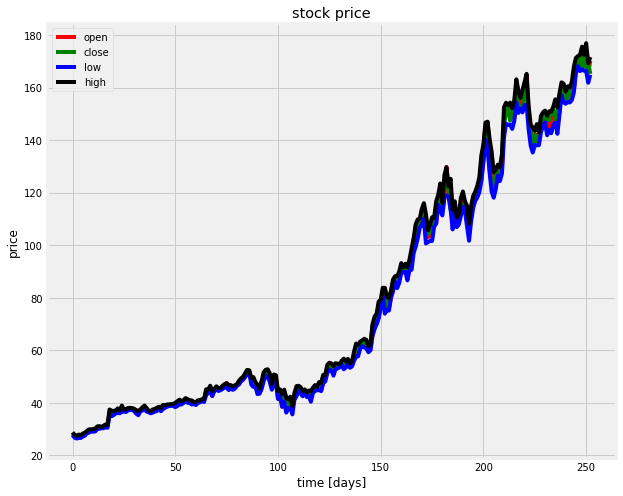

In [169]:
plt.figure(figsize=(20, 8));
plt.subplot(1,2,1);
plt.plot(sea_stock_data.Open.values, color='red', label='open')
plt.plot(sea_stock_data.Close.values, color='green', label='close')
plt.plot(sea_stock_data.Low.values, color='blue', label='low')
plt.plot(sea_stock_data.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

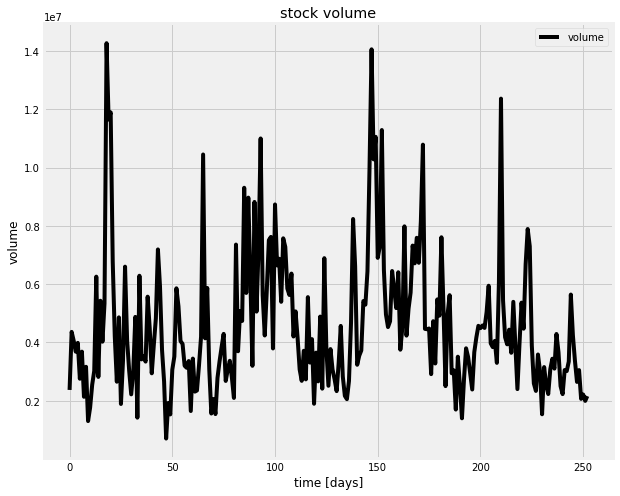

In [170]:
plt.figure(figsize=(20, 8));
plt.subplot(1,2,2);
plt.plot(sea_stock_data.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [171]:
sea_stock_data = sea_stock_data[['Open']]
print(sea_stock_data.head())

                 Open
Date                 
2019-10-17  28.520000
2019-10-18  27.559999
2019-10-21  26.980000
2019-10-22  27.230000
2019-10-23  26.770000


In [172]:
tencent_stock_data = tencent_stock_data[['Open']]
print(tencent_stock_data.head())

                 Open
Date                 
2019-10-17  42.119999
2019-10-18  42.080002
2019-10-21  41.410000
2019-10-22  41.680000
2019-10-23  40.529999


In [173]:
alibaba_stock_data = alibaba_stock_data[['Open']]
print(alibaba_stock_data.head())

                  Open
Date                  
2019-10-17  178.000000
2019-10-18  176.000000
2019-10-21  172.639999
2019-10-22  174.529999
2019-10-23  170.449997


In [174]:
sp_stock_data = sp_stock_data[['Open']]
print(sp_stock_data.head())

                   Open
Date                   
2019-10-17  3000.770020
2019-10-18  2996.840088
2019-10-21  2996.479980
2019-10-22  3010.729980
2019-10-23  2994.010010


In [175]:
sea_stock_data.info()
alibaba_stock_data.info()
tencent_stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


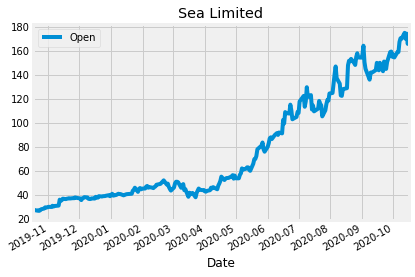

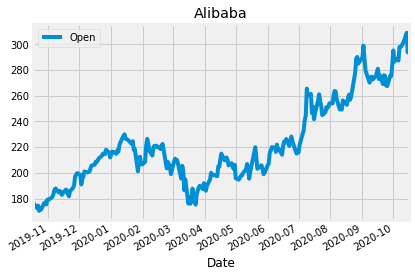

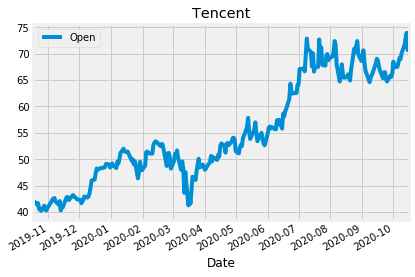

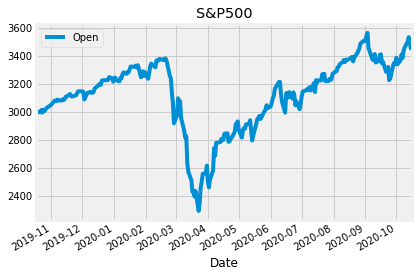

In [176]:
sea_stock_data.plot(title="Sea Limited")
alibaba_stock_data.plot(title="Alibaba")
tencent_stock_data.plot(title="Tencent")
sp_stock_data.plot(title="S&P500")

In [177]:
sea_stock_data.describe()



,Open
count,253.000000
mean,223.067636
std,34.187256
min,170.449997
25%,199.000000
50%,215.009995
75%,250.339996
max,309.000000


In [178]:
alibaba_stock_data.describe()

,Open
count,253.000000
mean,223.067636
std,34.187256
min,170.449997
25%,199.000000
50%,215.009995
75%,250.339996
max,309.000000


In [179]:
tencent_stock_data.describe()

,Open
count,253.000000
mean,55.230395
std,9.918008
min,40.209999
25%,48.310001
50%,52.660000
75%,65.860001
max,73.970001


In [81]:
sp_stock_data.describe()

,Open
count,253.000000
mean,3121.923871
std,254.990488
min,2290.709961
25%,3004.080078
50%,3147.179932
75%,3317.370117
max,3564.739990


In [180]:
sea_stock_return = sea_stock_data.pct_change()
print(sea_stock_return.head())

                Open
Date                
2019-10-17       NaN
2019-10-18 -0.033661
2019-10-21 -0.021045
2019-10-22  0.009266
2019-10-23 -0.016893


In [182]:
alibaba_stock_return = alibaba_stock_data.pct_change()
print(alibaba_stock_return.head())


                Open
Date                
2019-10-17       NaN
2019-10-18 -0.011236
2019-10-21 -0.019091
2019-10-22  0.010948
2019-10-23 -0.023377


In [183]:
tencent_stock_return = tencent_stock_data.pct_change()
print(tencent_stock_return.head())

                Open
Date                
2019-10-17       NaN
2019-10-18 -0.000950
2019-10-21 -0.015922
2019-10-22  0.006520
2019-10-23 -0.027591


In [184]:
sp_stock_return = sp_stock_data.pct_change()
sp_stock_return

,Open
Date,
2019-10-17,NaN
2019-10-18,-0.001310
2019-10-21,-0.000120
2019-10-22,0.004756
2019-10-23,-0.005553
2019-10-24,0.006937
2019-10-25,-0.003801
2019-10-28,0.009589
2019-10-29,0.001078


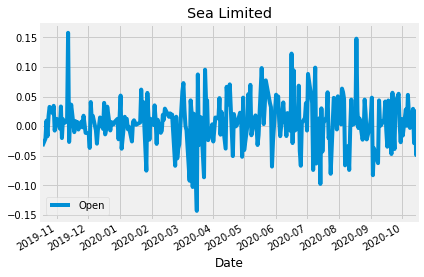

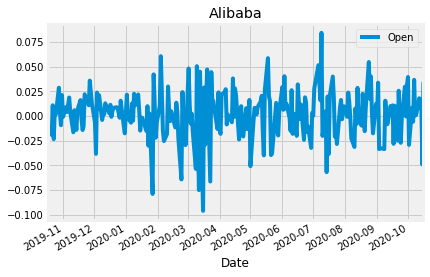

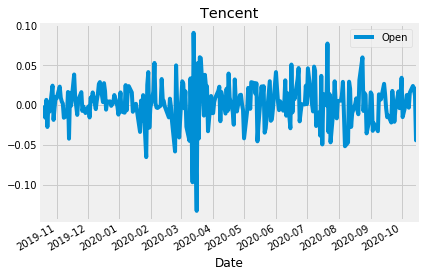

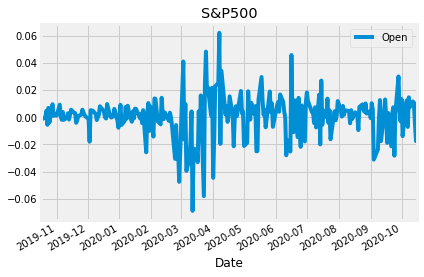

In [185]:
sea_stock_return.plot(title="Sea Limited")
alibaba_stock_return.plot(title="Alibaba")
tencent_stock_return.plot(title="Tencent")
sp_stock_return.plot(title="S&P500")

In [186]:
excess_return_sea = sea_stock_return.sub(sp_stock_return,axis=0)

excess_return_alibaba = alibaba_stock_return.sub(sp_stock_return,axis=0)
excess_return_tencent = tencent_stock_return.sub(sp_stock_return,axis=0)


In [187]:
excess_return_sea
print(excess_return_sea.head())

                Open
Date                
2019-10-17       NaN
2019-10-18 -0.032351
2019-10-21 -0.020925
2019-10-22  0.004511
2019-10-23 -0.011340


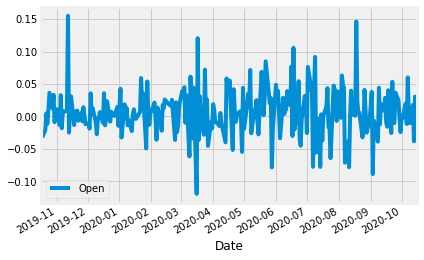

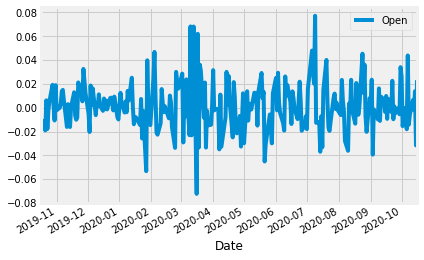

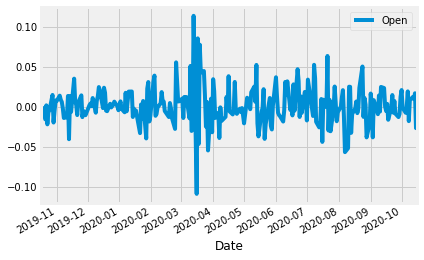

In [188]:
excess_return_sea.plot()
excess_return_alibaba.plot()
excess_return_tencent.plot()

In [189]:
excess_return_alibaba

,Open
Date,
2019-10-17,NaN
2019-10-18,-0.009926
2019-10-21,-0.018971
2019-10-22,0.006192
2019-10-23,-0.017824
2019-10-24,-0.002068
2019-10-25,0.005436
2019-10-28,0.019205
2019-10-29,0.002094


In [190]:
excess_return_tencent

,Open
Date,
2019-10-17,NaN
2019-10-18,0.000360
2019-10-21,-0.015802
2019-10-22,0.001765
2019-10-23,-0.022038
2019-10-24,-0.006444
2019-10-25,-0.004583
2019-10-28,0.014783
2019-10-29,-0.019772


In [191]:
avg_excess_return_sea = excess_return_sea.mean()
avg_excess_return_sea

Open    0.007209
dtype: float64

In [192]:
avg_excess_return_alibaba = excess_return_alibaba.mean()
avg_excess_return_alibaba

Open    0.001704
dtype: float64

In [193]:
avg_excess_return_tencent = excess_return_tencent.mean()
avg_excess_return_tencent

Open    0.001772
dtype: float64

In [194]:
sd_excess_return_sea = excess_return_sea.std()
sd_excess_return_sea

Open    0.035835
dtype: float64

In [195]:
sd_excess_return_alibaba = excess_return_alibaba.std()
sd_excess_return_alibaba

Open    0.020262
dtype: float64

In [196]:
sd_excess_return_tencent = excess_return_tencent.std()
sd_excess_return_tencent

Open    0.023749
dtype: float64

In [197]:
daily_sharpe_ratio_sea = avg_excess_return_sea.div(sd_excess_return_sea)
annual_factor = np.sqrt(253)
annual_sharpe_ratio_sea = daily_sharpe_ratio_sea.mul(annual_factor)
annual_sharpe_ratio_sea

Open    3.200085
dtype: float64

In [198]:
daily_sharpe_ratio_alibaba = avg_excess_return_alibaba.div(sd_excess_return_sea)
annual_sharpe_ratio_alibaba = daily_sharpe_ratio_alibaba.mul(annual_factor)
annual_sharpe_ratio_alibaba

Open    0.756274
dtype: float64

In [199]:
daily_sharpe_ratio_tencent = avg_excess_return_tencent.div(sd_excess_return_sea)

annual_sharpe_ratio_tencent = daily_sharpe_ratio_tencent.mul(annual_factor)
annual_sharpe_ratio_tencent

Open    0.786395
dtype: float64

Open    0.001772
dtype: float64


                  Open
Date                  
2019-10-17   28.520000
2019-10-18   27.559999
2019-10-21   26.980000
2019-10-22   27.230000
2019-10-23   26.770000
2019-10-24   27.219999
2019-10-25   28.110001
2019-10-28   28.730000
2019-10-29   29.719999
2019-10-30   29.500000
2019-10-31   29.750000
2019-11-01   30.120001
2019-11-04   30.000000
2019-11-05   31.000000
2019-11-06   30.379999
2019-11-07   30.740000
2019-11-08   30.900000
2019-11-11   31.160000
2019-11-12   36.080002
2019-11-13   35.119999
2019-11-14   35.619999
2019-11-15   36.919998
2019-11-18   36.549999
2019-11-19   36.869999
2019-11-20   37.020000
2019-11-21   37.279999
2019-11-22   37.070000
2019-11-25   37.360001
2019-11-26   37.290001
2019-11-27   37.950001
...                ...
2020-09-04  145.050003
2020-09-08  136.000000
2020-09-09  141.929993
2020-09-10  142.000000
2020-09-11  142.270004
2020-09-14  143.990005
2020-09-15  150.000000
2020-09-16  148.960007
2020-09-17  143.800003
2020-09-18  150.050003
2020-09-21 